In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
preds = pd.read_csv('../Submissions/BERT_v3/answer.csv')
test = pd.read_csv('../fnc-1-baseline-master/data/test.csv')
train = pd.read_csv('../fnc-1-baseline-master/data/train.csv')
test_bodies = pd.read_csv('../fnc-1-baseline-master/data/competition_test_bodies.csv')


In [ ]:
preds_withbody = preds.join(test_bodies.set_index('Body ID'), on='Body ID')
preds_withbody[['Body ID', 'Headline', 'Stance', 'articleBody']].to_csv('../fnc-1-baseline-master/data/qual.csv')

In [51]:
y_preds = []

for pred in preds['Stance']:
    if pred == 'disagree': y_preds.append(0)
    
    if pred == 'agree': y_preds.append(1)
    
    if pred == 'discuss': y_preds.append(2)
    
    if pred == 'unrelated': y_preds.append(3)
    

Accuracy: 0.9056388462597883
Precision: [0.42379182 0.54148118 0.83337376 0.97719677]
Recall: [0.16355811 0.70310037 0.76971326 0.98790125]
F1_Scores: [0.23602484 0.61179698 0.80027949 0.98251985]


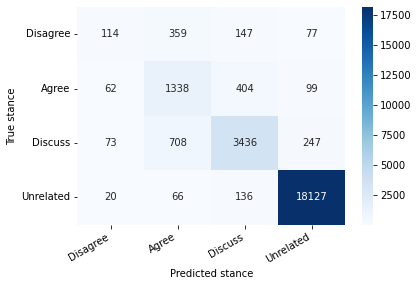

In [66]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True stance')
  plt.xlabel('Predicted stance');

class_names=['Disagree', 'Agree', 'Discuss', 'Unrelated']
cm = confusion_matrix(test['Stance'], y_preds)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

accuracy = accuracy_score(test['Stance'], y_preds)
print(f'Accuracy: {accuracy}')

precision = precision_score(test['Stance'], y_preds, average=None)
print(f'Precision: {precision}')

recall = recall_score(test['Stance'], y_preds, average=None)
print(f'Recall: {recall}')

f1_scores=f1_score(test['Stance'], y_preds, average=None)
print(f'F1_Scores: {f1_scores}')